In [42]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
# from collections import namedtuple
# Equilibrium = namedtuple('Equilibrium',['k','t','q'])

# Density physics

The most physically realistic physics are density-based physics. Here we will code up a class that plots the supply and demand curves, and calcualtes the equilibrium. To learn more about classes check out [this lecture](https://python-programming.quantecon.org/python_oop.html) at QuantEcon.

In [52]:
class TrafficProblem():
    def __init__(self, L = 3, a = 1.2, βt = .17, α=4., k0=7):
        self.k0 = k0
        self.L = L
        self.βt = βt
        self.α=α
        self.a = a
    
    def v(self,k):
        return self.a*np.exp(-(k/self.k0)**3)
    def Q(self,k):
        return self.v(k)*k
    def t(self,k):
        return self.L/self.v(k)
    def Td(self,q):
        return (self.α -q)/self.βt

    def findEquilibrium(self,guess=4.):
        f = lambda k: self.Td(self.Q(k))-self.t(k)
        k_eq = opt.root(f,x0=guess).x[0]
        t_eq = self.t(k_eq)
        q_eq = self.Q(k_eq)
        return pd.DataFrame({'k':[k_eq],'t':[t_eq], 'q':[q_eq]})
    
    def drawPlot(self,ylim=6): #you can pass whatever attributes you want here, such as the figure size
        fig,ax = plt.subplots(figsize=(4,3))
        ks = np.linspace(0,20,100)
        qs = self.Q(ks)
        ax.plot(qs,self.t(ks)) #supply plot T^s
        ax.plot(qs,self.Td(qs)) #demand
        ax.set_ylim(0,ylim)
        ax.set_xlim(0,ax.get_xlim()[1])
        ax.set_xlabel('q')
        ax.set_ylabel('t')
        # fig.tight_layout()
        


,k,t,q
0,4.009552,3.016869,3.987132


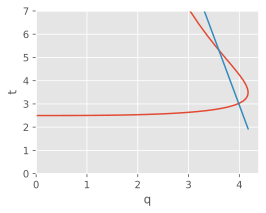

In [54]:
#here's an example. we plot  
TP = TrafficProblem(α=4.5)
TP.drawPlot(ylim=7) #say we want to see up to t = 7
TP.findEquilibrium(guess=5)
# it looks like this guess was about right because the result is where the lines intersect at about (q=4,t=3)

# Flow physics

In [ ]:
fig,ax = plt.subplots()
ks = np.linspace(0,20,100)

# Qd = lambda t,m: α - 

# Tolls to target a certain travel time


# Queues and capacity limits